# Fits including systematic errors

Make sure to run :

- lwb_weighting and
- lwb_weighting_pairwise 

before running this notebook. The two scrips above generate files that are used by this program.

In [1]:
# Baseline weight type
weight_type = "_wtot"

In [2]:
import matplotlib.pyplot as plt
from   matplotlib.pyplot import *
import sys
import pylab as pl
import numpy as np
from   copy import copy
import pandas
from astropy.io import fits
from astropy.table import Table, Column
import os.path                                                                                                                                                                       
from numpy import genfromtxt
from math import *
from astropy.coordinates import SkyCoord
import pandas as pd  
import scipy.stats
from scipy import stats

from scipy import optimize

import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


In [3]:
# Wtot files are used as the baseline

# Amplitude files are in this order
# row 1: small R, row2: large R, row3: all R

# Amplitude arrays
amparray_wtot=[]
amparray_wtot.append("LOWZ_0.15_0.31_amplitudes_wtot.txt")
amparray_wtot.append("LOWZ_0.31_0.43_amplitudes_wtot.txt")
amparray_wtot.append("CMASS_0.43_0.54_amplitudes_wtot.txt")
amparray_wtot.append("CMASS_0.54_0.7_amplitudes_wtot.txt")

amparray_errs_wtot=[]
amparray_errs_wtot.append("LOWZ_0.15_0.31_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("LOWZ_0.31_0.43_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("CMASS_0.43_0.54_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("CMASS_0.54_0.7_amplitudes_errs_wtot.txt")

amparray_now=[]
amparray_now.append("LOWZ_0.15_0.31_amplitudes_now.txt")
amparray_now.append("LOWZ_0.31_0.43_amplitudes_now.txt")
amparray_now.append("CMASS_0.43_0.54_amplitudes_now.txt")
amparray_now.append("CMASS_0.54_0.7_amplitudes_now.txt")

amparray_errs_now=[]
amparray_errs_now.append("LOWZ_0.15_0.31_amplitudes_errs_now.txt")
amparray_errs_now.append("LOWZ_0.31_0.43_amplitudes_errs_now.txt")
amparray_errs_now.append("CMASS_0.43_0.54_amplitudes_errs_now.txt")
amparray_errs_now.append("CMASS_0.54_0.7_amplitudes_errs_now.txt")

# Internal Nstar test with HSC
amparray_hscnstar=[]
amparray_hscnstar.append("HSC_CMASS_0.54_0.70_nstartests_amplitudes.txt")

amparray_errs_hscnstar=[]
amparray_errs_hscnstar.append("HSC_CMASS_0.54_0.70_nstartests_amplitudes_errs.txt")

# Pairwise Amplitude arrays
pamparraykids=[]
pamparraykids.append("LOWZ_0.15_0.31_KIDS_SDSSref_amplitudes_wtot.txt")
pamparraykids.append("LOWZ_0.31_0.43_KIDS_SDSSref_amplitudes_wtot.txt")
pamparraykids.append("CMASS_0.43_0.54_KIDS_HSCref_amplitudes_wtot.txt")
pamparraykids.append("CMASS_0.54_0.7_KIDS_HSCref_amplitudes_wtot.txt")

pamparray_errs_kids=[]
pamparray_errs_kids.append("LOWZ_0.15_0.31_KIDS_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_kids.append("LOWZ_0.31_0.43_KIDS_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_kids.append("CMASS_0.43_0.54_KIDS_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_kids.append("CMASS_0.54_0.7_KIDS_HSCref_amplitudes_errs_wtot.txt")

pamparraydes=[]
pamparraydes.append("LOWZ_0.15_0.31_DES_SDSSref_amplitudes_wtot.txt")
pamparraydes.append("LOWZ_0.31_0.43_DES_SDSSref_amplitudes_wtot.txt")
pamparraydes.append("CMASS_0.43_0.54_DES_HSCref_amplitudes_wtot.txt")
pamparraydes.append("CMASS_0.54_0.7_DES_HSCref_amplitudes_wtot.txt")

pamparray_errs_des=[]
pamparray_errs_des.append("LOWZ_0.15_0.31_DES_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_des.append("LOWZ_0.31_0.43_DES_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_des.append("CMASS_0.43_0.54_DES_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_des.append("CMASS_0.54_0.7_DES_HSCref_amplitudes_errs_wtot.txt")

pamparraycfht=[]
pamparraycfht.append("LOWZ_0.15_0.31_CFHT_SDSSref_amplitudes_wtot.txt")
pamparraycfht.append("LOWZ_0.31_0.43_CFHT_SDSSref_amplitudes_wtot.txt")
pamparraycfht.append("CMASS_0.43_0.54_CFHT_HSCref_amplitudes_wtot.txt")
pamparraycfht.append("CMASS_0.54_0.7_CFHT_HSCref_amplitudes_wtot.txt")

pamparray_errs_cfht=[]
pamparray_errs_cfht.append("LOWZ_0.15_0.31_CFHT_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cfht.append("LOWZ_0.31_0.43_CFHT_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cfht.append("CMASS_0.43_0.54_CFHT_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_cfht.append("CMASS_0.54_0.7_CFHT_HSCref_amplitudes_errs_wtot.txt")

pamparraycs82=[]
pamparraycs82.append("LOWZ_0.15_0.31_CS82_SDSSref_amplitudes_wtot.txt")
pamparraycs82.append("LOWZ_0.31_0.43_CS82_SDSSref_amplitudes_wtot.txt")
pamparraycs82.append("CMASS_0.43_0.54_CS82_HSCref_amplitudes_wtot.txt")
pamparraycs82.append("CMASS_0.54_0.7_CS82_HSCref_amplitudes_wtot.txt")

pamparray_errs_cs82=[]
pamparray_errs_cs82.append("LOWZ_0.15_0.31_CS82_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cs82.append("LOWZ_0.31_0.43_CS82_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_cs82.append("CMASS_0.43_0.54_CS82_HSCref_amplitudes_errs_wtot.txt")
pamparray_errs_cs82.append("CMASS_0.54_0.7_CS82_HSCref_amplitudes_errs_wtot.txt")

pamparrayhsc=[]
pamparrayhsc.append("LOWZ_0.15_0.31_HSC_SDSSref_amplitudes_wtot.txt")
pamparrayhsc.append("LOWZ_0.31_0.43_HSC_SDSSref_amplitudes_wtot.txt")

pamparray_errs_hsc=[]
pamparray_errs_hsc.append("LOWZ_0.15_0.31_HSC_SDSSref_amplitudes_errs_wtot.txt")
pamparray_errs_hsc.append("LOWZ_0.31_0.43_HSC_SDSSref_amplitudes_errs_wtot.txt")

# Useful Routines

In [4]:
# Provide data and errors, and sigma_sys, return reduced chi2-1 with weighed mean
# Data and errors passed as globals
def computechi2minus1(sigs):
    
    global data2
    global errs2
    
    n=len(data2)
    
    # inverse variance mean
    w = np.zeros(n)
    for i in range(0, n):
        w[i]=1.0/(errs2[i]**2)
    
    wmean = np.average(data2, weights=w)
    
    #Compute reduced chi2
    chi2=0.0

    for i in range(0, n):
        chi2+=((data2[i]-wmean)**2)/(errs2[i]**2+sigs**2)
    
    rchi2 = chi2/(n-1)

    # Reduced chi2 -1
    return rchi2-1

In [5]:
# function to fit
def linfunc(x, a, b):
    return a*x + b

# Plots Related to Homogeneity Effects

In [6]:
# read in systematics files
# Order of these files should match ones from amplitudes :
# DES, CFHT, HSC,CS82,KiDS,SDSS 
# experiments = ["DES","CFHT","HSC","CS82","KiDS","SDSS"] 

file="lowzstar_ordered.txt"
Lstar = np.loadtxt(file)

file="lowzsee_ordered.txt"
Lsee = np.loadtxt(file)

file="cmassstar_ordered.txt"
Cstar = np.loadtxt(file)

file="cmasssee_ordered.txt"
Csee = np.loadtxt(file)

# These are the medians in the paper table
# DES, CFHT, HSC,CS82,KiDS,SDSS 
zsource = [0.59,0.7,0.8,0.57,0.67,0.39]   

# DES zL =  0.23, zL = 0.36, zL = 0.49, zL = 0.59.
# CFHTLENs   zL = 0.23, zL = 0.36, zL = 0.49, zL = 0.60.
# HSC : 0.23, zL = 0.36, zL = 0.49, zL = 0.59
# Cs82 : z = 0.227, z = 0.362, z = 0.488,  z = 0.586. 
# Kids: zL =0.23,zL =0.36,zL =0.49,zL =0.58.

# DES, CFHT, HSC,CS82,KiDS,SDSS 
c1zeff = [0.49,0.49,0.49,0.488,0.49]
c2zeff = [0.59,0.60,0.59,0.586, 0.58]

# DES, CFHT, HSC,CS82,KiDS,SDSS 
file="BOSSN_overlap_ordered.txt"
area_n = np.loadtxt(file)
print("area north",area_n)

file="BOSSS_overlap_ordered.txt"
area_s = np.loadtxt(file)
print("\n area south",area_s)

frac_area = area_n/(area_n+area_s)
print("frac area",frac_area)


area north [5.81932117e+00 4.45415760e+01 1.07734486e+02 0.00000000e+00
 2.04044252e+02 6.74996669e+03]

 area south [ 154.12431145   73.43901358   58.22271815  143.99705337    0.
 1608.76855031]
frac area [0.03638358 0.37753309 0.64917029 0.         1.         0.80753445]


# Variations in Nstar

--------
data sample 0 radial range 0
beta -0.0039
betaerr 0.0014
beta sig 2.7857142857142856
--------
data sample 0 radial range 1
beta -0.0017
betaerr 0.0019
beta sig 0.8947368421052632
--------
data sample 0 radial range 2
beta -0.004
betaerr 0.0013
beta sig 3.076923076923077
--------
data sample 1 radial range 0
beta -0.0026
betaerr 0.0016
beta sig 1.6249999999999998
--------
data sample 1 radial range 1
beta -0.0014
betaerr 0.002
beta sig 0.7
--------
data sample 1 radial range 2
beta -0.0026
betaerr 0.0014
beta sig 1.857142857142857
--------
data sample 2 radial range 0
beta -0.0001
betaerr 0.0023
beta sig 0.04347826086956522
--------
data sample 2 radial range 1
beta -0.0018
betaerr 0.0026
beta sig 0.6923076923076923
--------
data sample 2 radial range 2
beta -0.0012
betaerr 0.002
beta sig 0.6
--------
data sample 3 radial range 0
beta 0.0032
betaerr 0.0027
beta sig 1.1851851851851851
--------
data sample 3 radial range 1
beta 0.0074
betaerr 0.0029
beta sig 2.5517241379310347
--

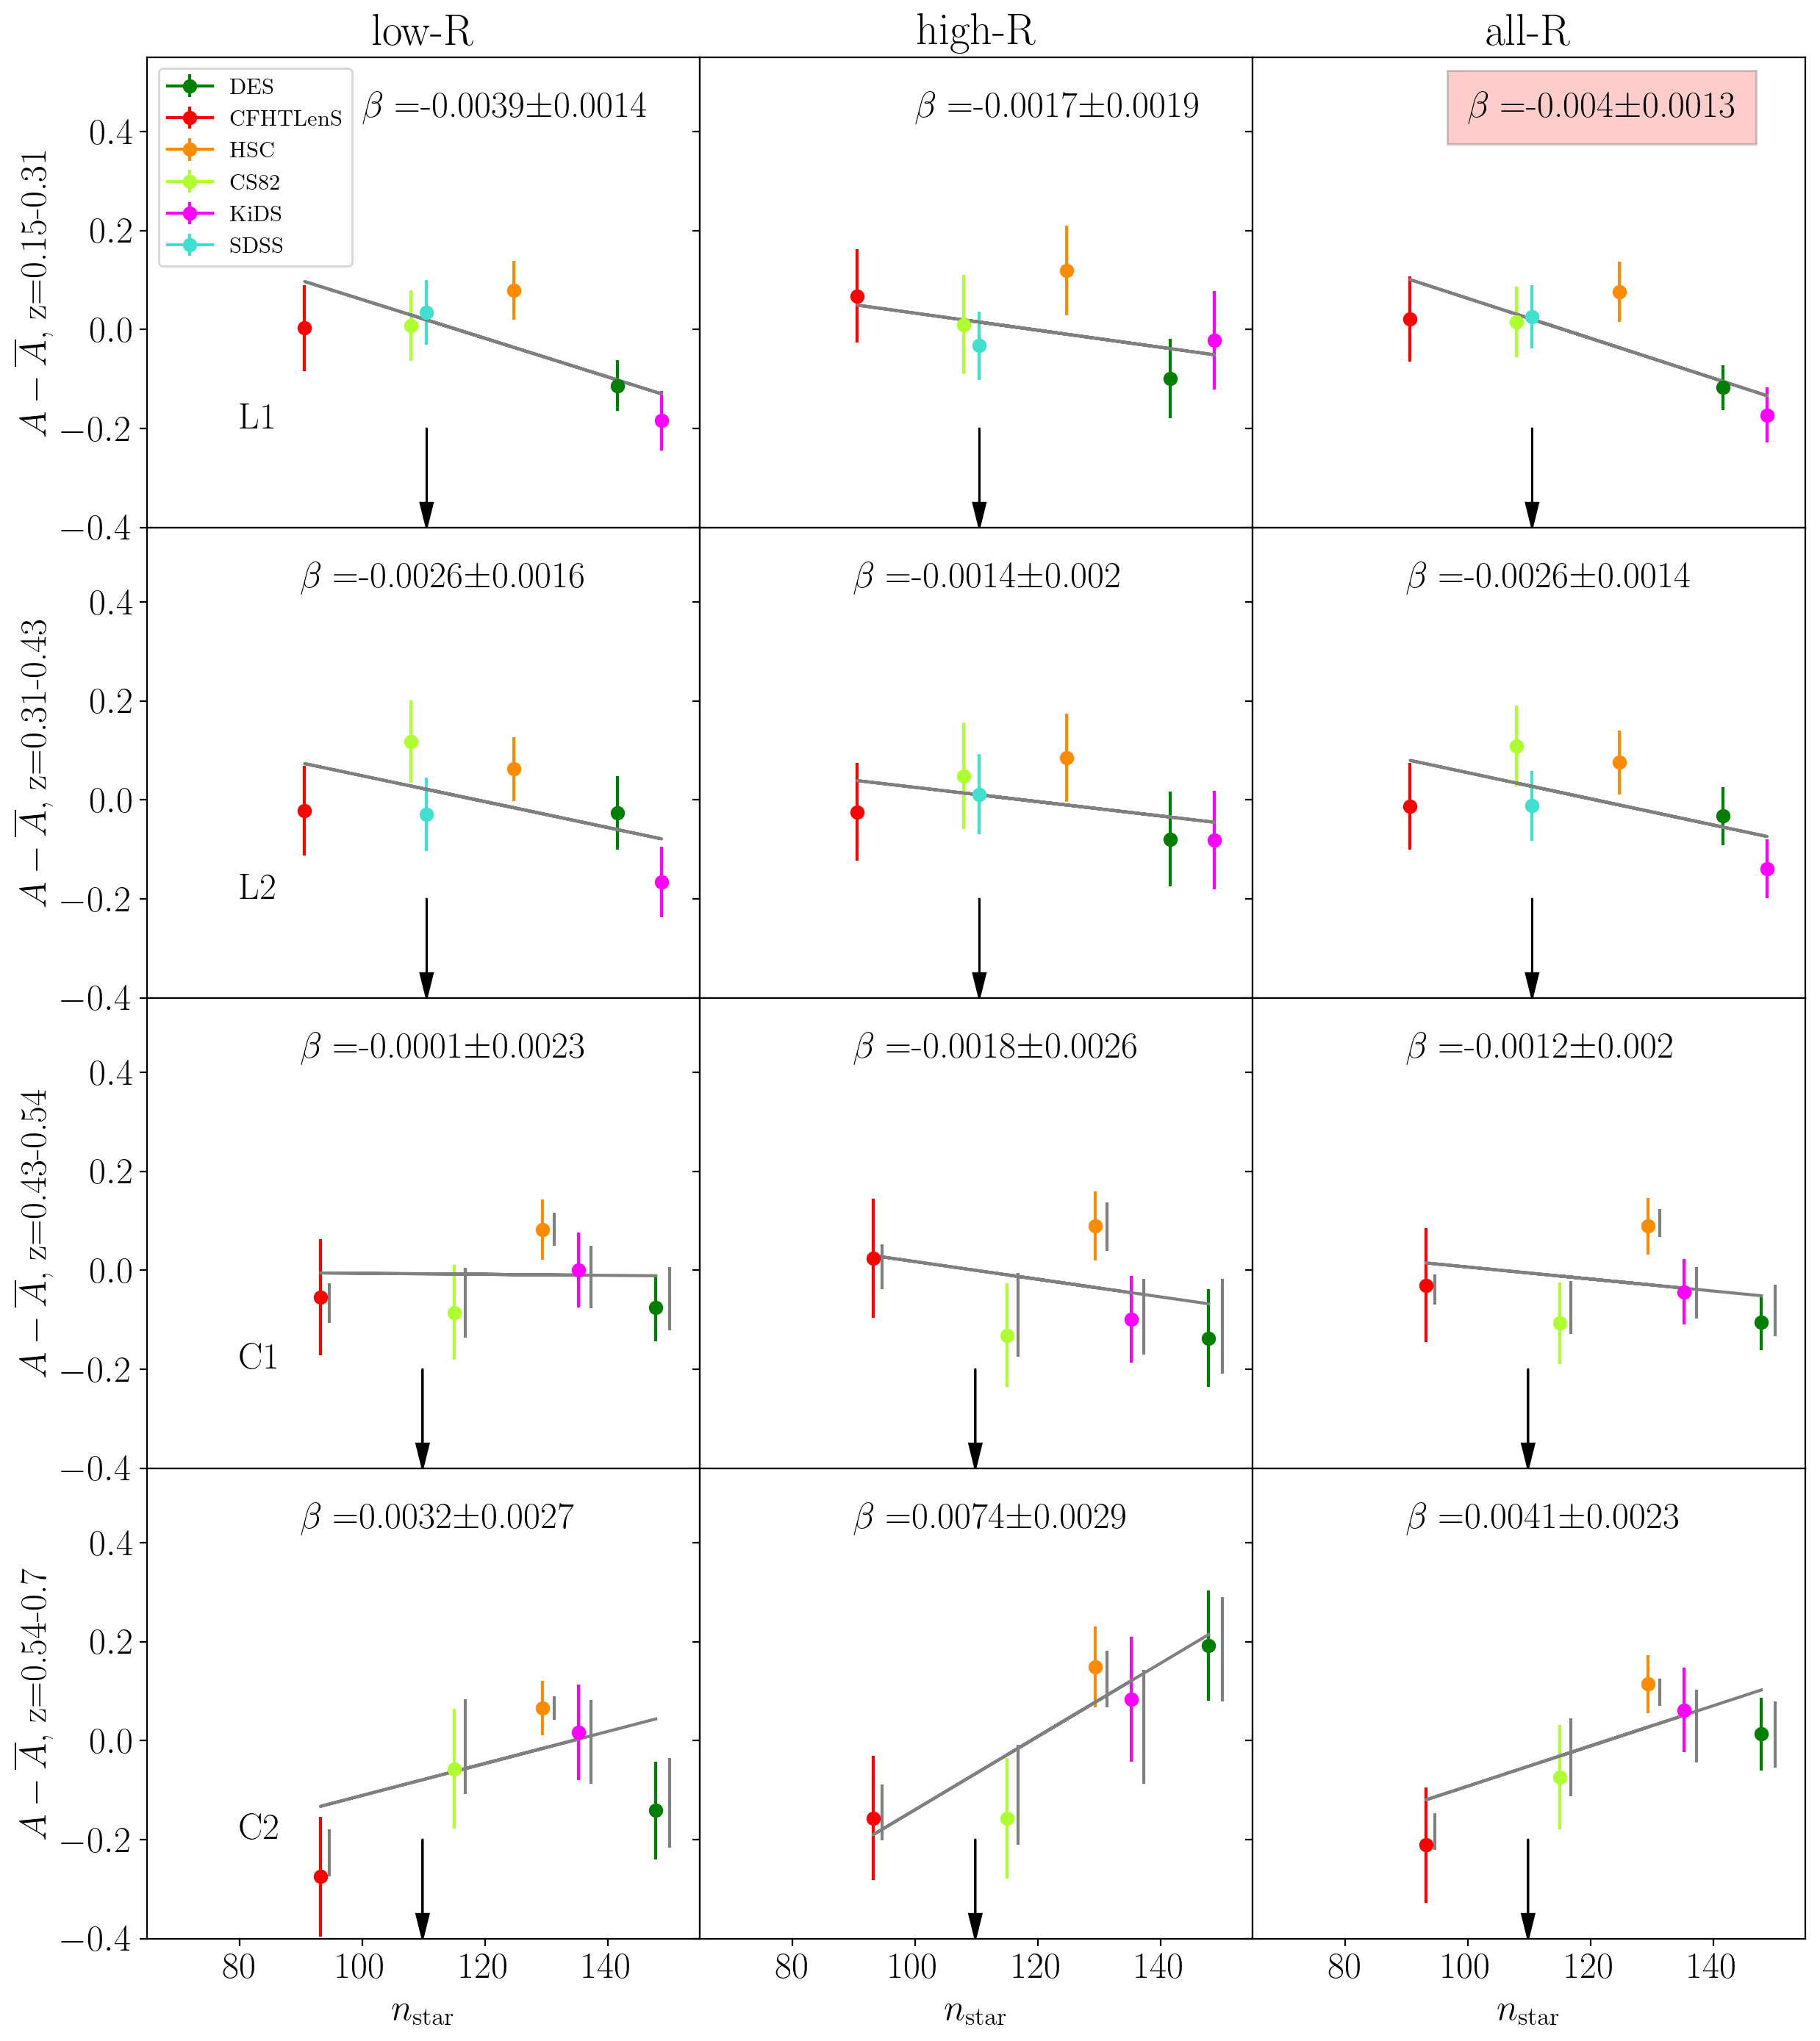

In [7]:
# Subtract weighed mean from the y-axis

plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        if (r < 2):
            nstar=Lstar
        else:
            nstar=Cstar
            
        ax = axes[r,c]
        
        #Reported sys err array
        # L1
        if(r==0):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # L2
        if(r==1):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # C1
        if(r==2):
            des_syserr=np.array([0.02,0.02,0.02])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])

        # C2
        if(r==3):
            des_syserr=np.array([0.03,0.03,0.03])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
  
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
        
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # ---- Add syst errors here
        errs[0]=np.sqrt(errs[0]**2 + des_syserr[c]**2)
        errs[1]=np.sqrt(errs[1]**2 + cfht_syserr[c]**2)
        errs[2]=np.sqrt(errs[2]**2 + hsc_syserr[c]**2)
        errs[3]=np.sqrt(errs[3]**2 + cs82_syserr[c]**2)
        errs[4]=np.sqrt(errs[4]**2 + kids_syserr[c]**2)
        if(r < 2):
            errs[5]=np.sqrt(errs[5]**2 + sdss_syserr[c]**2)
                
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(nstar[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(nstar[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(nstar[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(nstar[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(nstar[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(nstar[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
        
        # Plot arrow for SDSS
        ax.arrow(nstar[5], -0.2, 0, -0.15,head_width=2.0, head_length=0.05, fc='k', ec='k')
          
        # Add the plots for UNWEIGHTED Signals
        # Only for CMASS
        dd=1.015
        if(r > 1):
            ax.errorbar(nstar[0]*dd,allamp_now[c,0]-meanamp_now,yerr=allamp_errs_now[c,0],color="grey") 
            ax.errorbar(nstar[1]*dd,allamp_now[c,1]-meanamp_now,yerr=allamp_errs_now[c,1],color="grey")
            ax.errorbar(nstar[2]*dd,allamp_now[c,2]-meanamp_now,yerr=allamp_errs_now[c,2],color="grey")
            ax.errorbar(nstar[3]*dd,allamp_now[c,3]-meanamp_now,yerr=allamp_errs_now[c,3],color="grey")
            ax.errorbar(nstar[4]*dd,allamp_now[c,4]-meanamp_now,yerr=allamp_errs_now[c,4],color="grey")
        

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, nstar[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(nstar[:5],p(nstar[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, nstar , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(nstar,p(nstar),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------")
        print("data sample", r, "radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(100, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(100, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
        if (r>=1):        
            if (betasig < 3):
                ax.text(90, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(90, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(80, -0.2, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(80, -0.2, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(80, -0.2, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(80, -0.2, 'C2', fontsize=18)
            
        if(r==3):
            ax.set_xlabel(r'$n_{\rm star}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(65,155)
        ax.set_ylim(-0.4,0.55)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_nstar_withsyserr.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# SDSS PSF FWHM

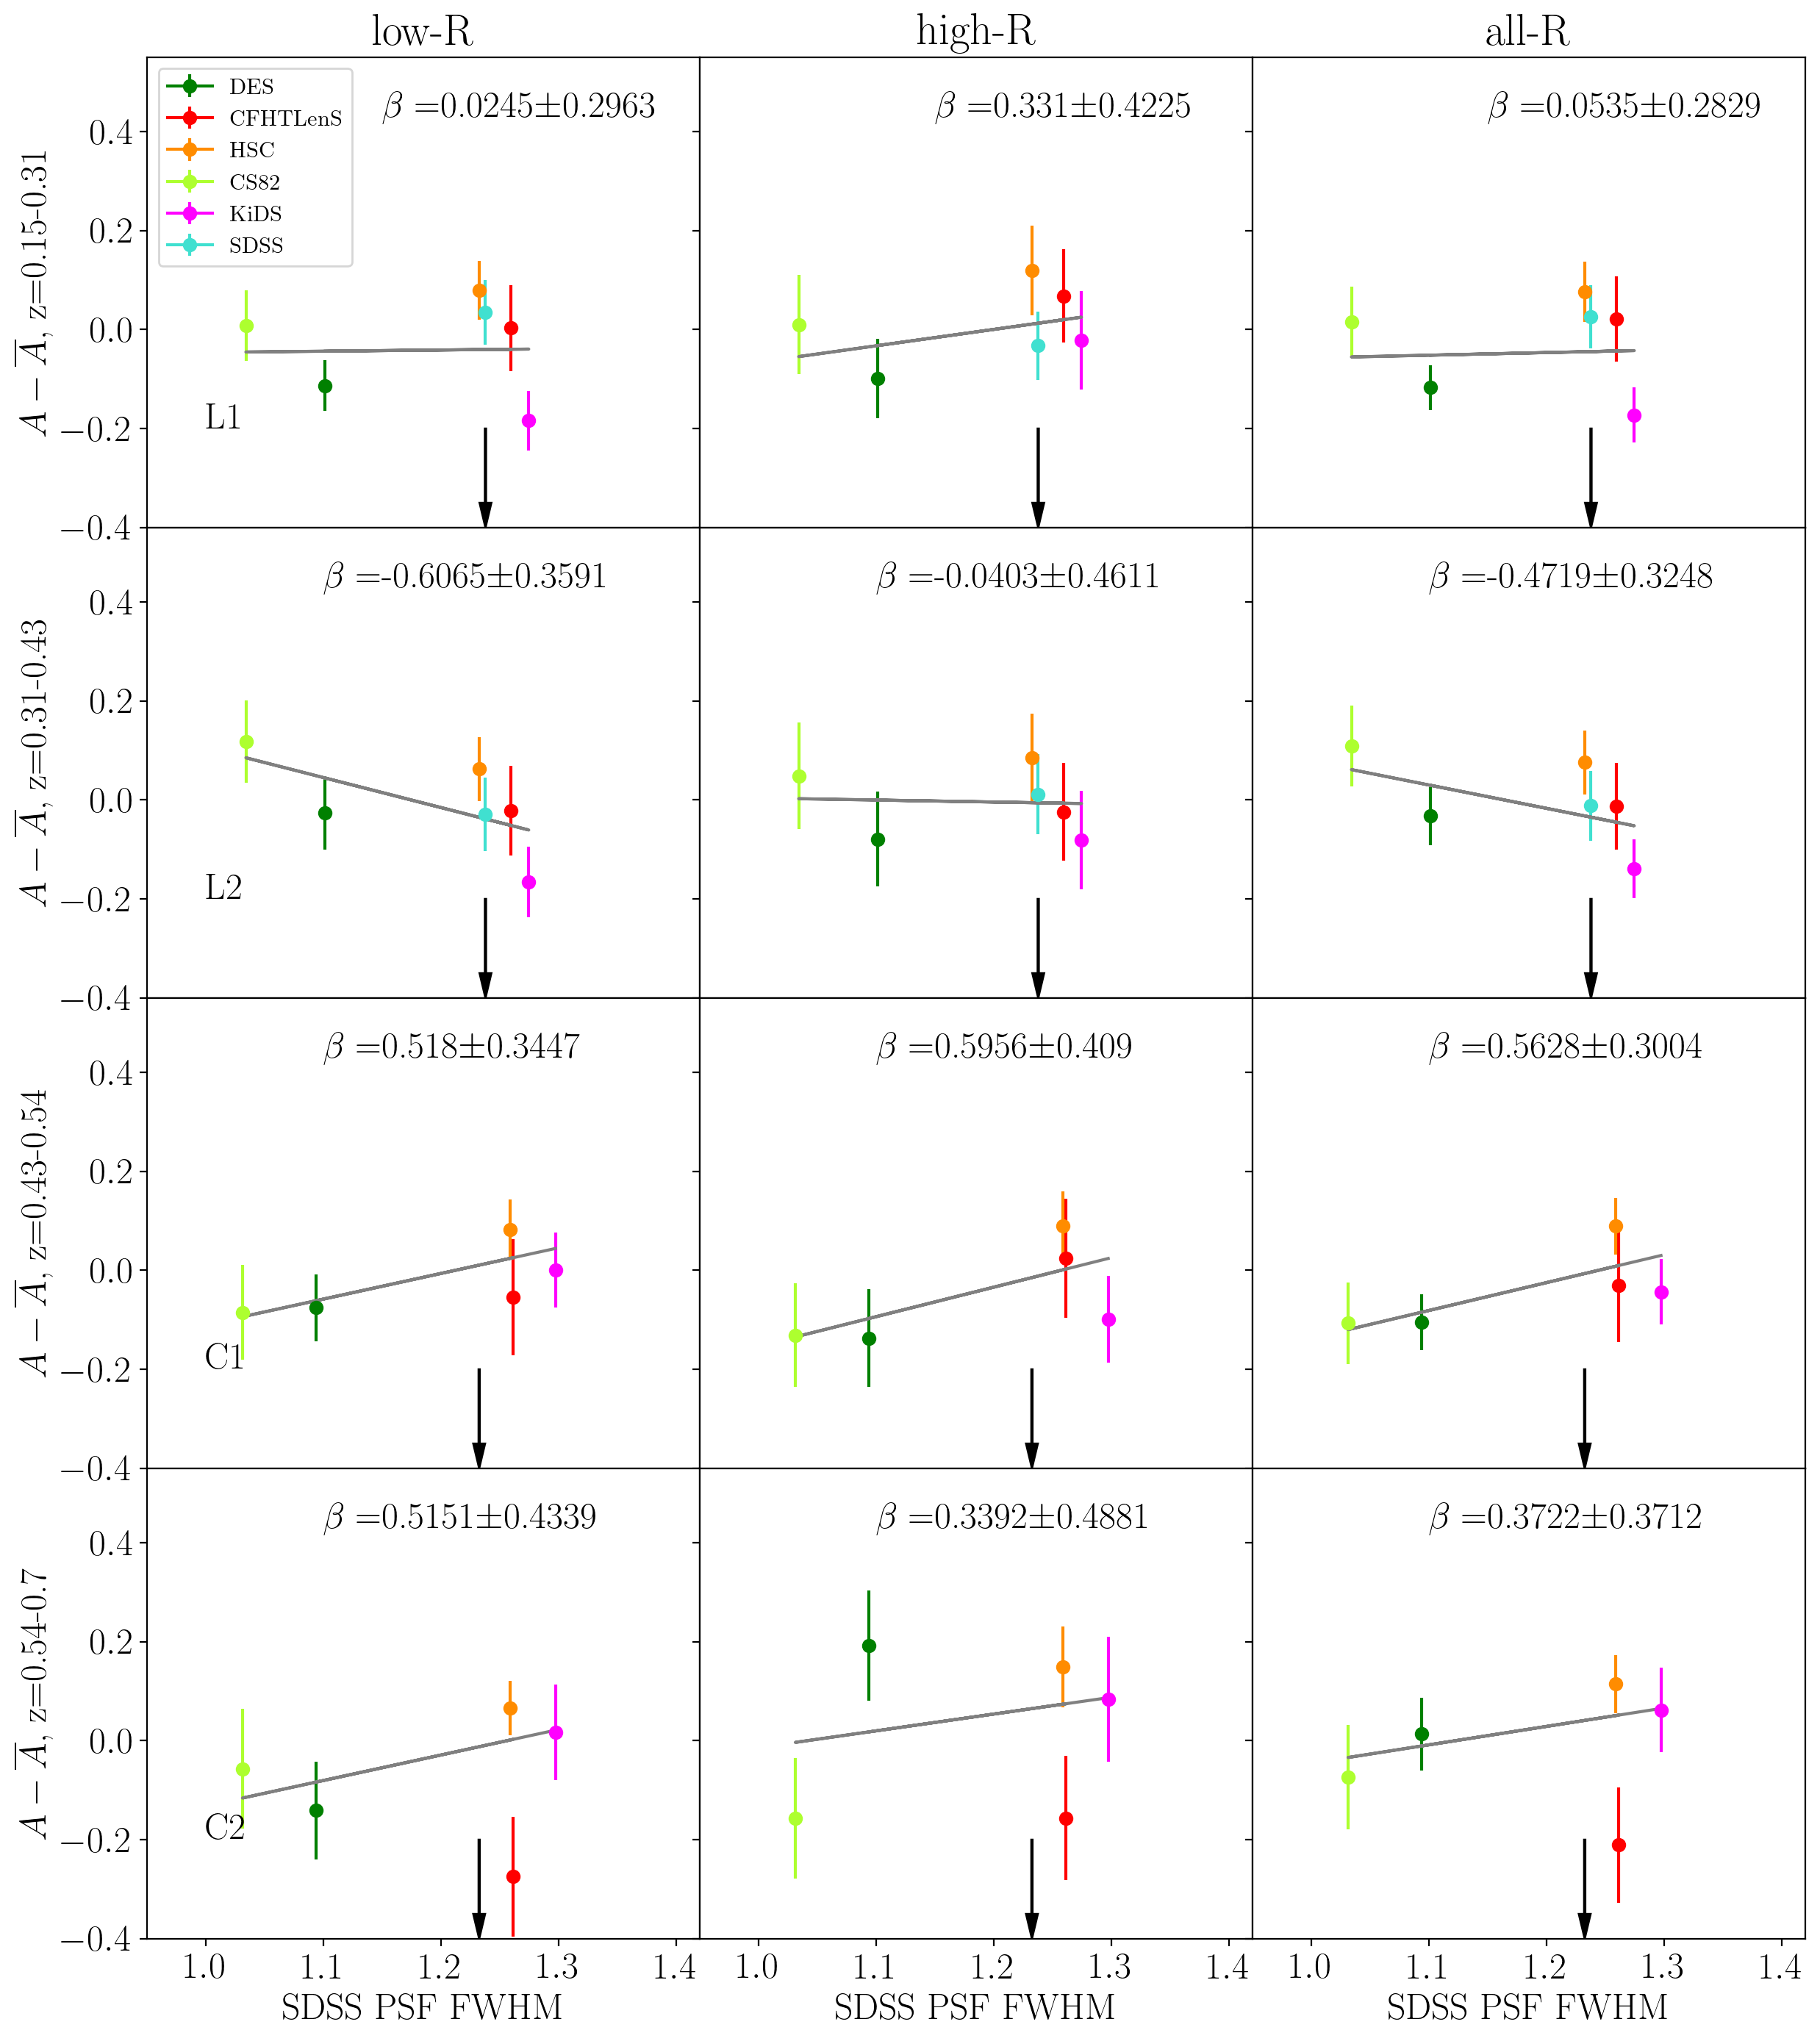

In [8]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        if (r < 2):
            see=Lsee
        else:
            see=Csee
            
        ax = axes[r,c]
        
        #Reported sys err array
        # L1
        if(r==0):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # L2
        if(r==1):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # C1
        if(r==2):
            des_syserr=np.array([0.02,0.02,0.02])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])

        # C2
        if(r==3):
            des_syserr=np.array([0.03,0.03,0.03])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])
        
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # ---- Add syst errors here
        errs[0]=np.sqrt(errs[0]**2 + des_syserr[c]**2)
        errs[1]=np.sqrt(errs[1]**2 + cfht_syserr[c]**2)
        errs[2]=np.sqrt(errs[2]**2 + hsc_syserr[c]**2)
        errs[3]=np.sqrt(errs[3]**2 + cs82_syserr[c]**2)
        errs[4]=np.sqrt(errs[4]**2 + kids_syserr[c]**2)
        if(r < 2):
            errs[5]=np.sqrt(errs[5]**2 + sdss_syserr[c]**2)
            
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(see[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(see[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(see[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(see[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(see[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(see[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
        
        # Plot arrow for SDSS
        ax.arrow(see[5], -0.2, 0, -0.15,head_width=0.01, head_length=0.05, fc='k', ec='k')
          
        # Add the plots for UNWEIGHTED Signals
        # Only for CMASS
        #dd=1.015
        #if(r > 1):
        #    ax.errorbar(Csee[0]*dd,allamp_now[c,0]-meanamp_now,yerr=allamp_errs_now[c,0],color="grey") 
        #    ax.errorbar(Csee[1]*dd,allamp_now[c,1]-meanamp_now,yerr=allamp_errs_now[c,1],color="grey")
        #    ax.errorbar(Csee[2]*dd,allamp_now[c,2]-meanamp_now,yerr=allamp_errs_now[c,2],color="grey")
        #    ax.errorbar(Csee[3]*dd,allamp_now[c,3]-meanamp_now,yerr=allamp_errs_now[c,3],color="grey")
        #    ax.errorbar(Csee[4]*dd,allamp_now[c,4]-meanamp_now,yerr=allamp_errs_now[c,4],color="grey")

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, see[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(see[:5],p(see[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, see , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(see,p(see),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        #print("")
        #print("data sample", r, "radial range",c)
        #print("beta",beta)
        #print("betaerr",betaerr)
        #print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(1.15, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(1.15, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r>=1):
            if (betasig < 3):
                ax.text(1.1, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(1.1, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
        
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(1.0, -0.2, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(1.0, -0.2, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(1.0, -0.2, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(1.0, -0.2, 'C2', fontsize=18)
            
        if(r==3):
            ax.set_xlabel('SDSS PSF FWHM')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.95,1.42)
        ax.set_ylim(-0.4,0.55)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    
        
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_psf_withsyserr.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# Z source

  
--------------
Data Sample 0
--------------
radial range 0
beta 0.0344
betaerr 0.2045
beta sig 0.16821515892420538
--------------
radial range 1
beta 0.319
betaerr 0.2503
beta sig 1.2744706352377146
--------------
radial range 2
beta 0.052
betaerr 0.2031
beta sig 0.25603151157065485
  
--------------
Data Sample 1
--------------
radial range 0
beta 0.0763
betaerr 0.2284
beta sig 0.33406304728546415
--------------
radial range 1
beta 0.0698
betaerr 0.2746
beta sig 0.2541879096868172
--------------
radial range 2
beta 0.061
betaerr 0.2201
beta sig 0.27714675147660156
  
--------------
Data Sample 2
--------------
radial range 0
beta 0.7261
betaerr 0.3778
beta sig 1.921916357861302
--------------
radial range 1
beta 1.0521
betaerr 0.4514
beta sig 2.3307487815684538
--------------
radial range 2
beta 0.8912
betaerr 0.3388
beta sig 2.6304604486422667
  
--------------
Data Sample 3
--------------
radial range 0
beta 0.7783
betaerr 0.4205
beta sig 1.8508917954815696
--------------
radial 

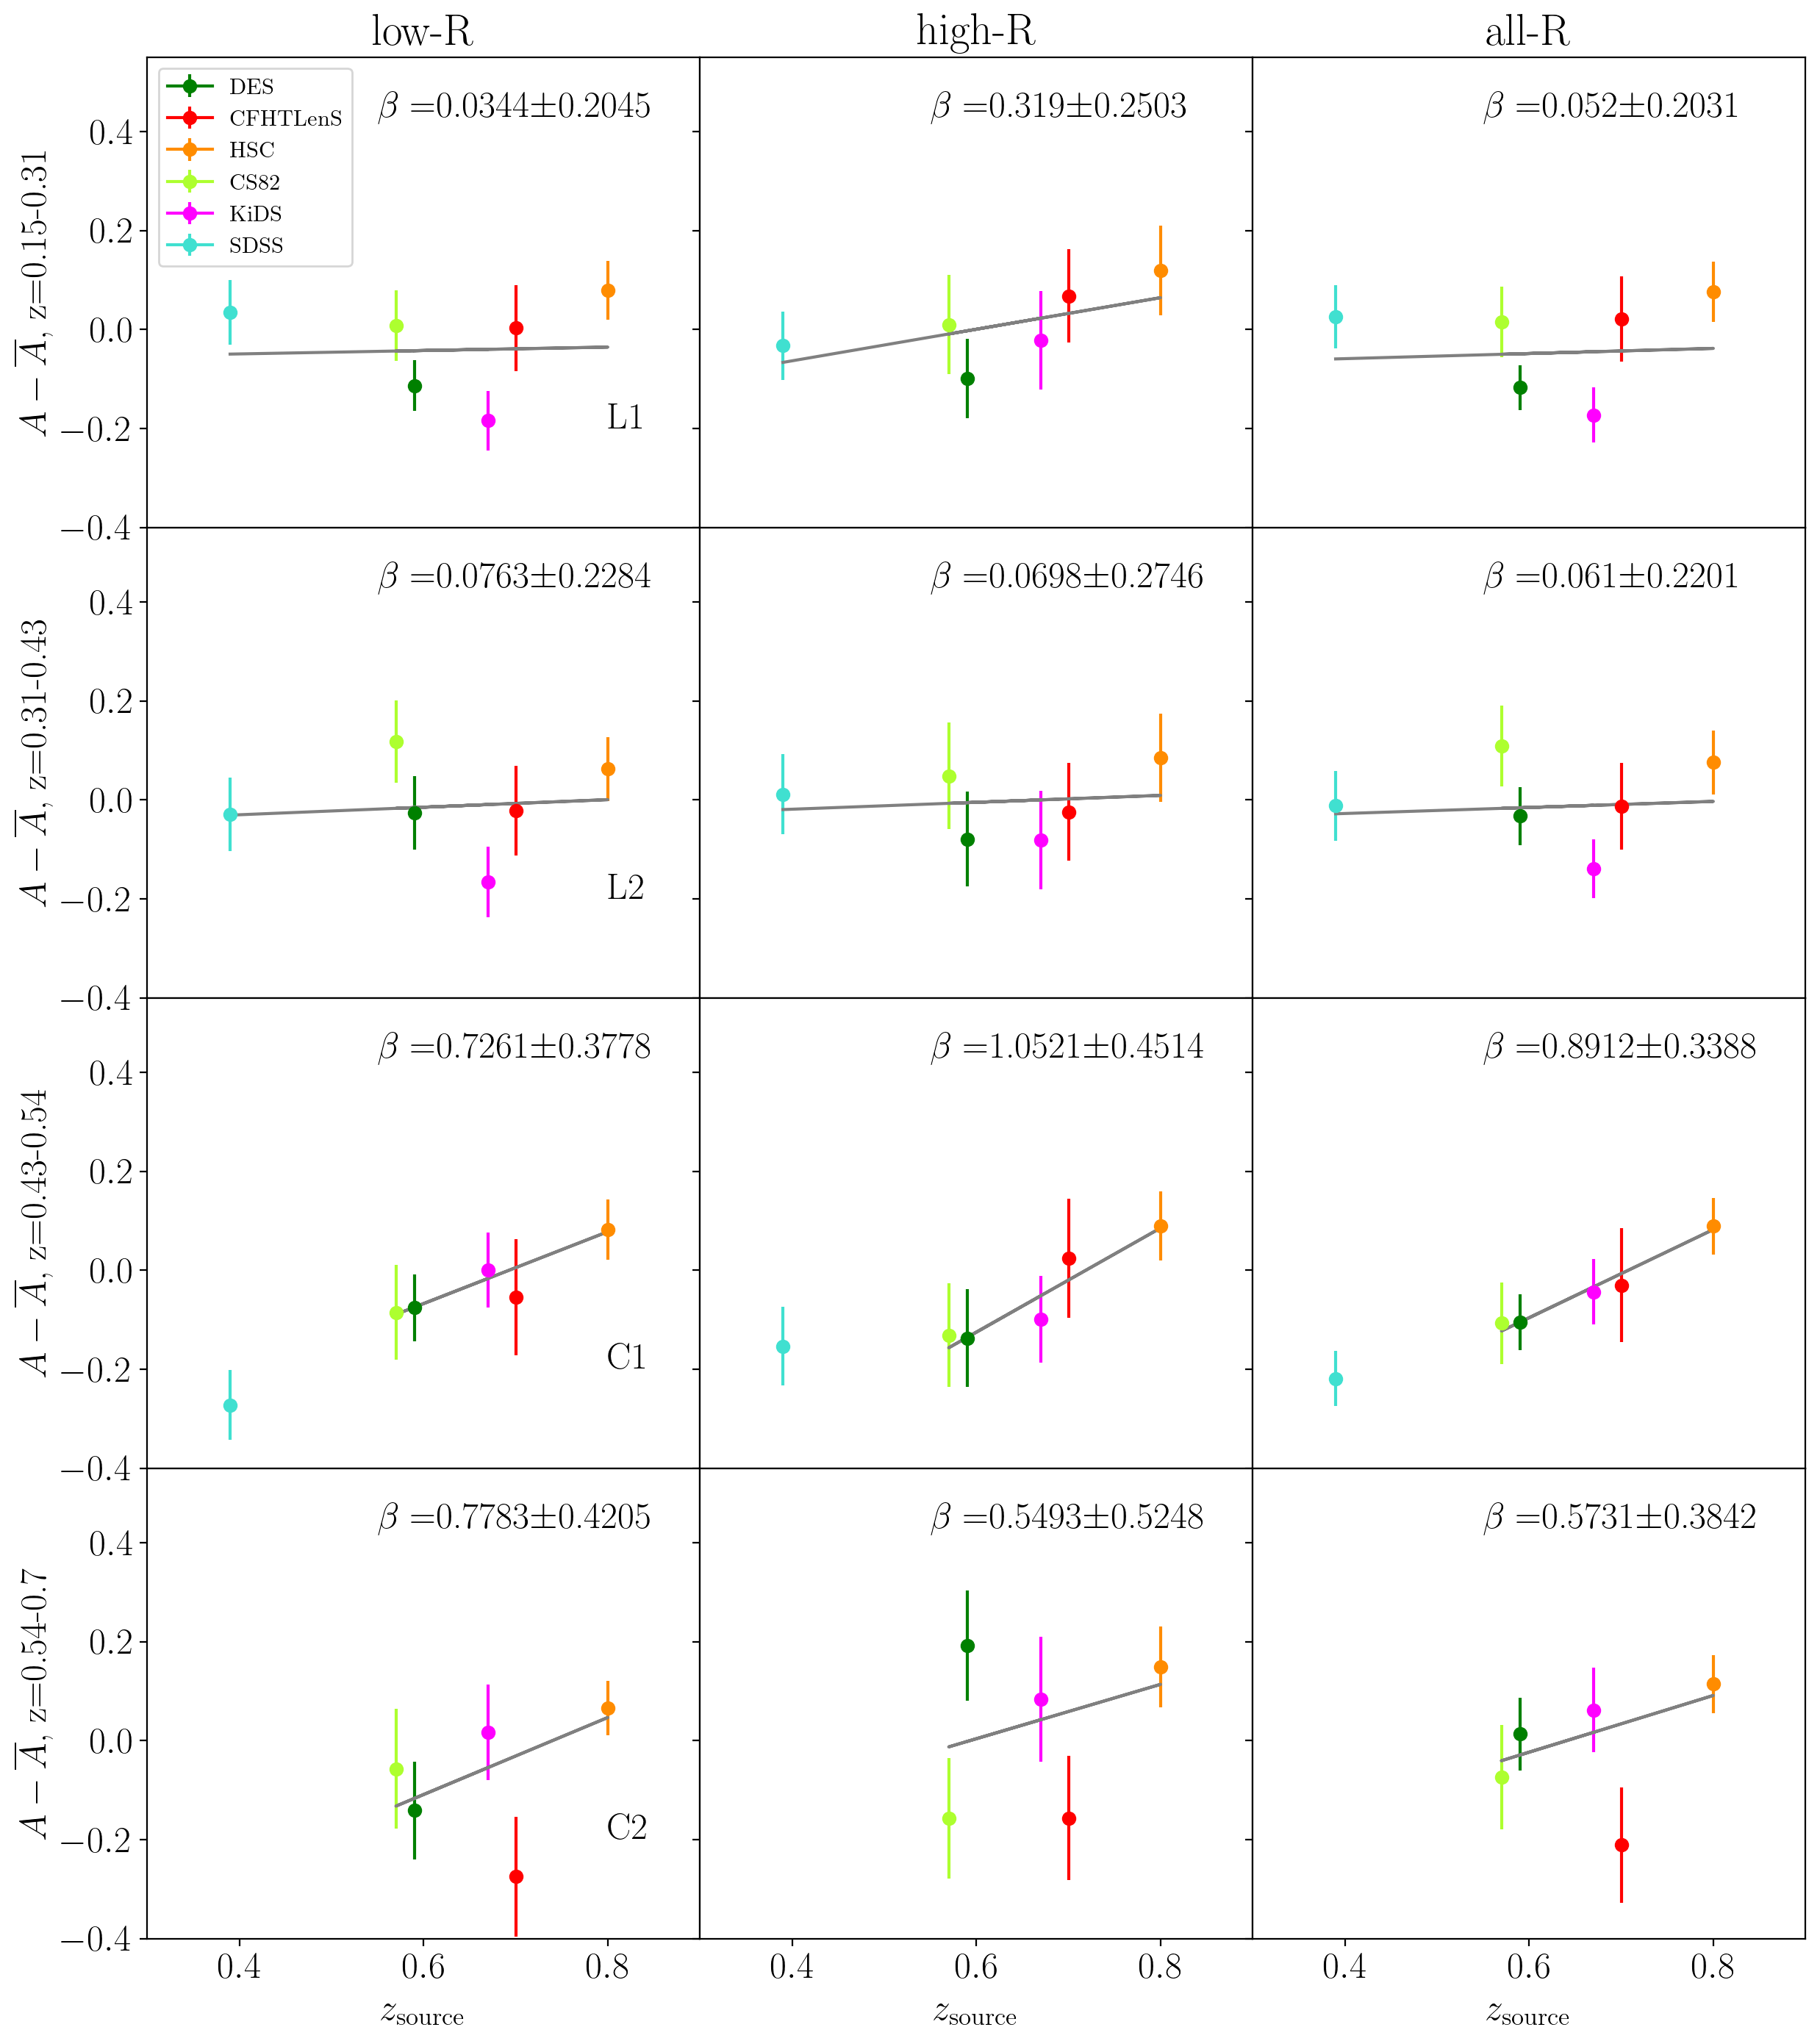

In [9]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    
    print("  ")
    print("--------------")
    print("Data Sample",r)
        
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        #Reported sys err array
        # L1
        if(r==0):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # L2
        if(r==1):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # C1
        if(r==2):
            des_syserr=np.array([0.02,0.02,0.02])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])

        # C2
        if(r==3):
            des_syserr=np.array([0.03,0.03,0.03])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])
            
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
            
        # ---- Add syst errors here
        errs[0]=np.sqrt(errs[0]**2 + des_syserr[c]**2)
        errs[1]=np.sqrt(errs[1]**2 + cfht_syserr[c]**2)
        errs[2]=np.sqrt(errs[2]**2 + hsc_syserr[c]**2)
        errs[3]=np.sqrt(errs[3]**2 + cs82_syserr[c]**2)
        errs[4]=np.sqrt(errs[4]**2 + kids_syserr[c]**2)
        if(r < 2):
            errs[5]=np.sqrt(errs[5]**2 + sdss_syserr[c]**2)
            
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        ax.errorbar(zsource[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(zsource[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(zsource[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(zsource[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(zsource[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(zsource[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
                     
        # Postblinding test adding in back SDSS, only for C1
        if(r == 2):
            sdssamp = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes.txt")
            sdssamperr = np.loadtxt("SDSS_CMASS_0.43_0.54_amplitudes_errs.txt")
            ax.errorbar(zsource[5],sdssamp[c]-meanamp,yerr=sdssamperr[c],color="turquoise",label="SDSS",marker='o') 

        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, zsource[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(zsource[:5],p(zsource[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, zsource , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(zsource,p(zsource),'gray')
            
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------------")
        print("radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
        
        if (r==0):
            if (betasig < 3):
                ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r>=1):
            if (betasig < 3):
                ax.text(0.55, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.55, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
    
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(0.8, -0.2, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(0.8, -0.2, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(0.8, -0.2, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(0.8, -0.2, 'C2', fontsize=18) 
            
        if(r==3):
            ax.set_xlabel(r'$z_{\rm source}$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(0.3,0.9)
        ax.set_ylim(-0.4,0.55)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")   
                
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_zsource_withsyserr.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()

# North versus South

--------------
radial range 0
beta -0.0093
betaerr 0.0658
beta sig 0.1413373860182371
--------------
radial range 1
beta 0.0434
betaerr 0.0961
beta sig 0.45161290322580644
--------------
radial range 2
beta -0.0034
betaerr 0.0618
beta sig 0.05501618122977346
--------------
radial range 0
beta -0.1436
betaerr 0.082
beta sig 1.751219512195122
--------------
radial range 1
beta 0.0034
betaerr 0.1061
beta sig 0.03204524033930254
--------------
radial range 2
beta -0.1078
betaerr 0.0714
beta sig 1.5098039215686274
--------------
radial range 0
beta 0.1285
betaerr 0.0901
beta sig 1.4261931187569368
--------------
radial range 1
beta 0.1019
betaerr 0.1094
beta sig 0.9314442413162707
--------------
radial range 2
beta 0.1232
betaerr 0.0777
beta sig 1.5855855855855856
--------------
radial range 0
beta 0.2071
betaerr 0.116
beta sig 1.785344827586207
--------------
radial range 1
beta 0.1258
betaerr 0.1374
beta sig 0.9155749636098981
--------------
radial range 2
beta 0.1359
betaerr 0.0982
beta 

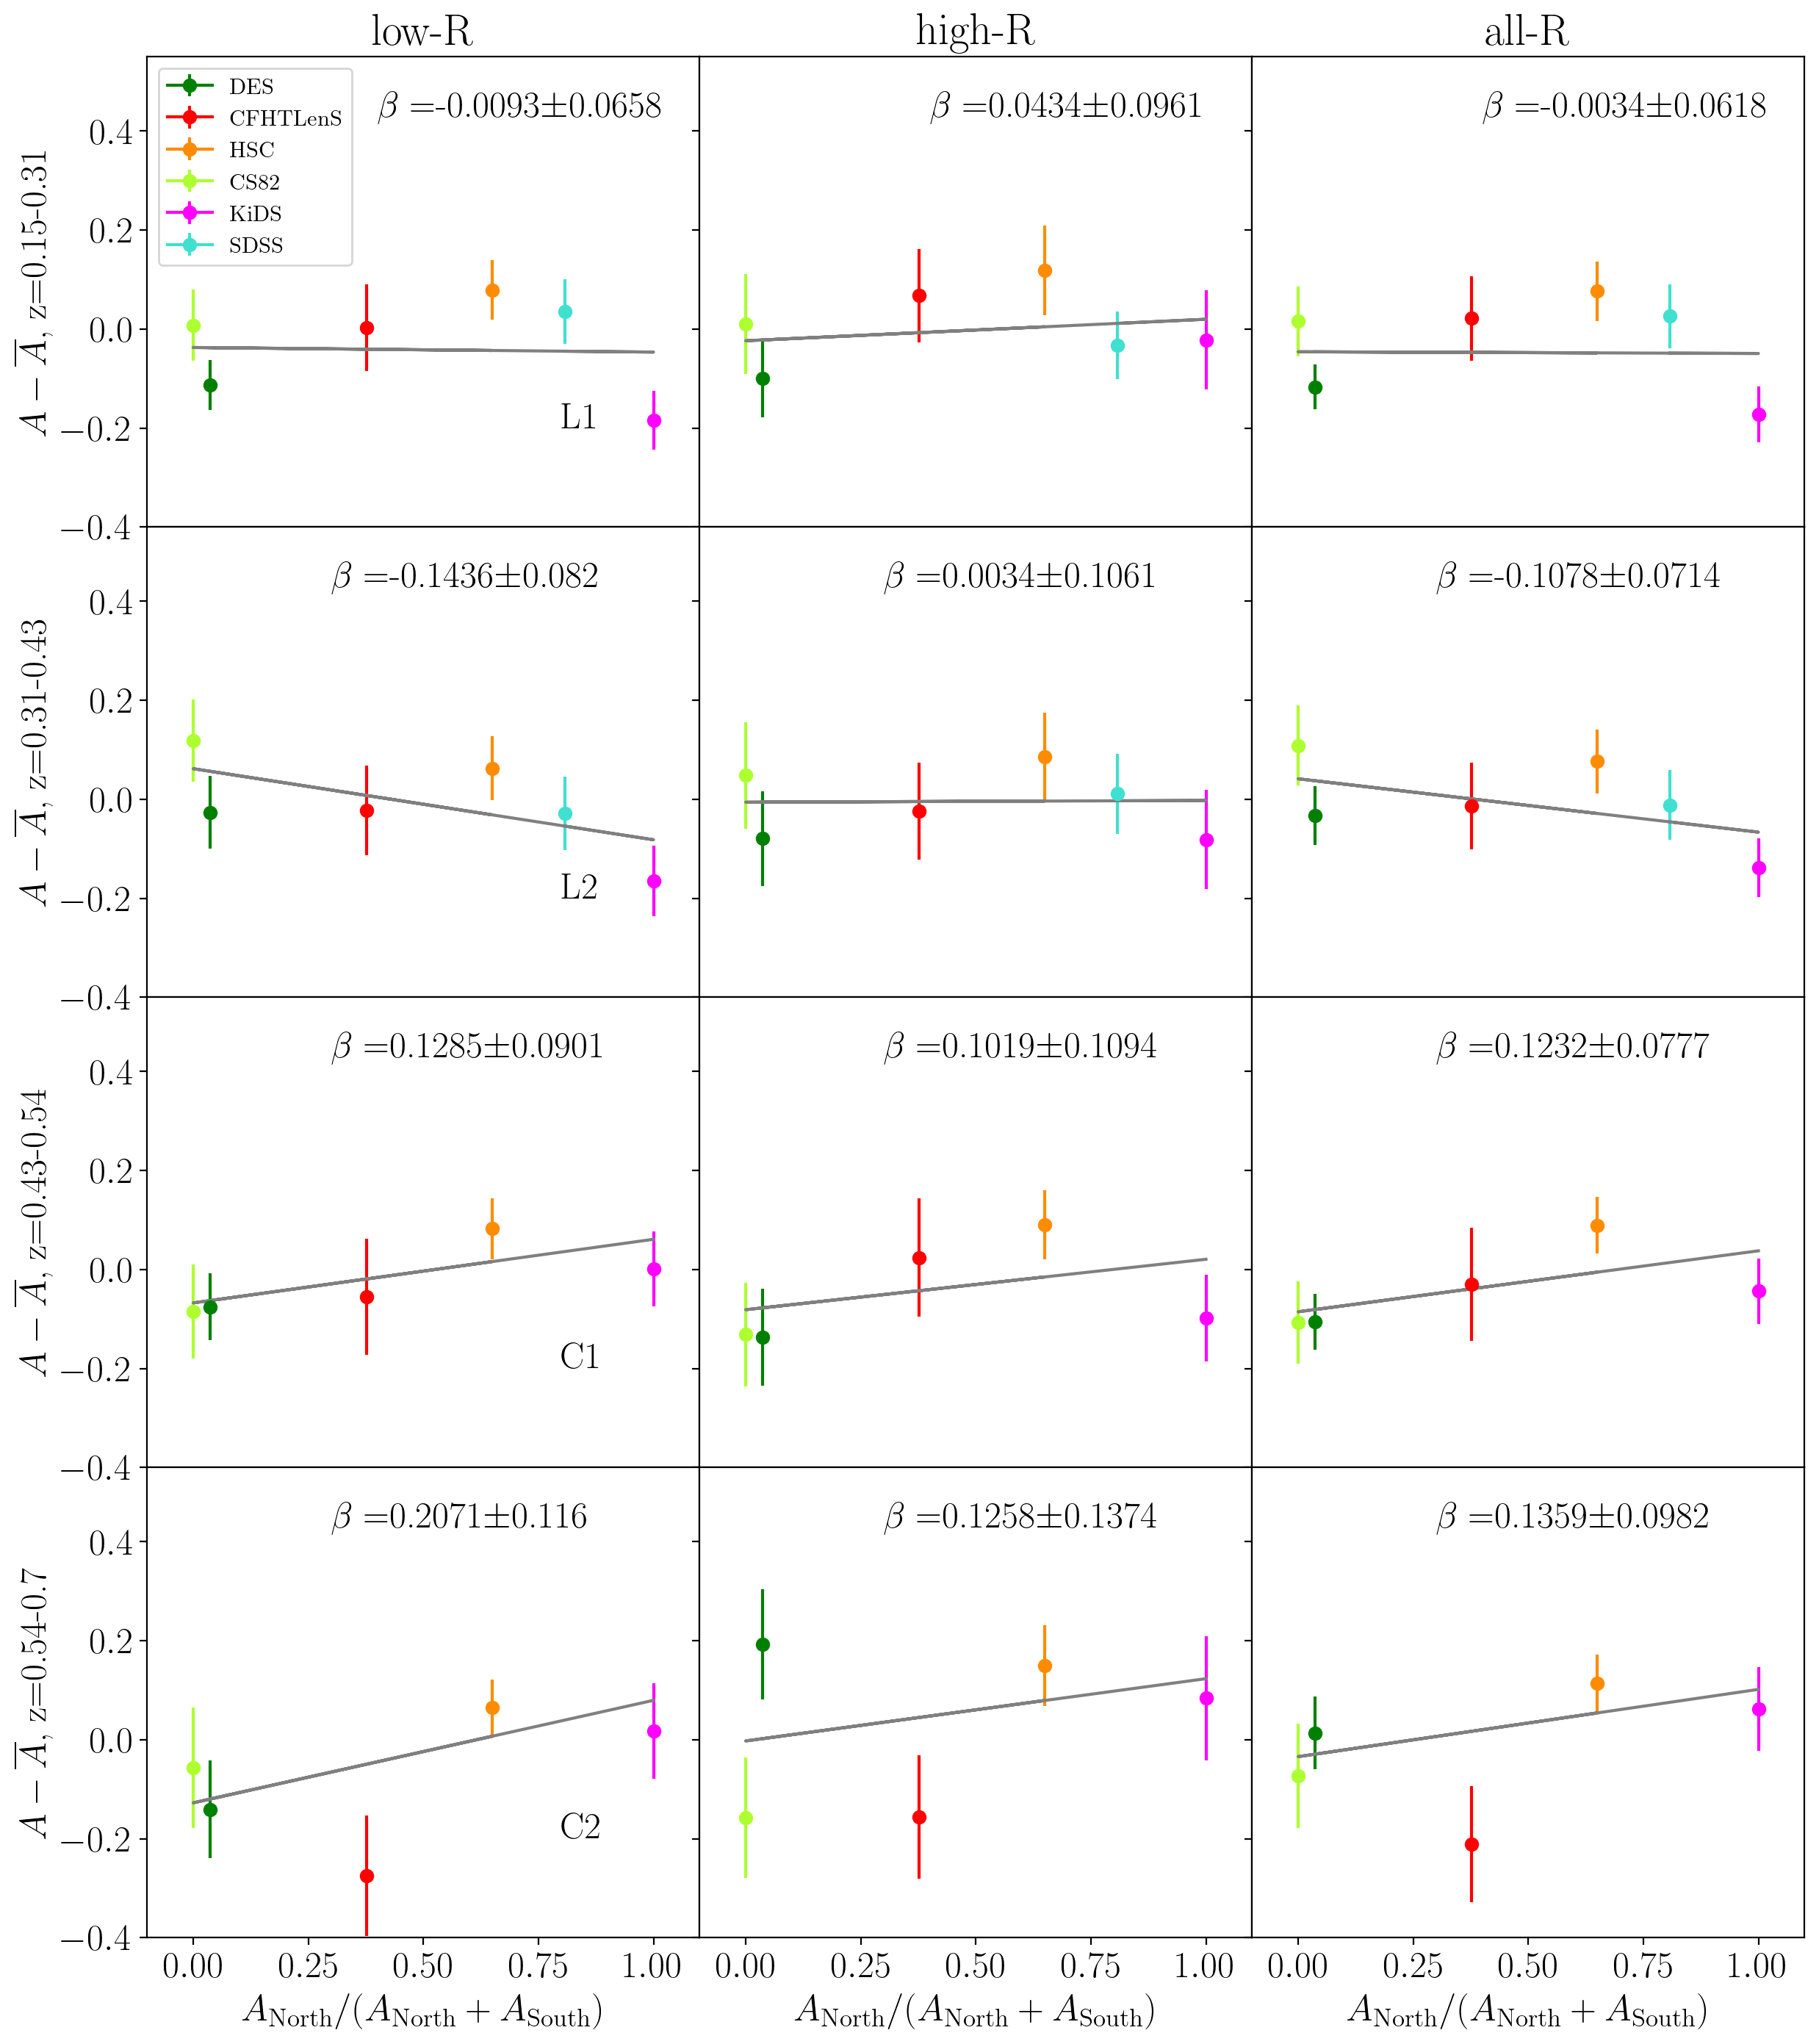

In [10]:
plt.rcParams.update({'font.size': 18})
Fig, axes = plt.subplots(4,3,figsize=(12,16))

# CMASS and LOWZ
for r in range(0,4):       # One row is one data sample
    for c in range(0,3):   # Each colums is a different radial range

        ax = axes[r,c]
        
        #Reported sys err array
        # L1
        if(r==0):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # L2
        if(r==1):
            des_syserr=np.array([0.03,0.02,0.02])
            cfht_syserr=np.array([0.08,0.08,0.08])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.03,0.03,0.03])
            sdss_syserr=np.array([0.06,0.06,0.06])

        # C1
        if(r==2):
            des_syserr=np.array([0.02,0.02,0.02])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])

        # C2
        if(r==3):
            des_syserr=np.array([0.03,0.03,0.03])
            cfht_syserr=np.array([0.11,0.11,0.11])
            hsc_syserr=np.array([0.05,0.05,0.05])
            cs82_syserr=np.array([0.06,0.06,0.06])
            kids_syserr=np.array([0.04,0.04,0.04])

            
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])
        allamp_now = np.loadtxt(amparray_now[r])
        allamp_errs_now = np.loadtxt(amparray_errs_now[r])
            
        # Compute the weighted mean
        # inverse variance mean
        
        data=allamp_now[c,:] # C determines which radial range
        wht = 1.0/(allamp_errs_now[c,:]**2)
        meanamp_now = np.average(data, weights=wht) # inverse variance mean
  
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean

        # ---- Add syst errors here
        errs[0]=np.sqrt(errs[0]**2 + des_syserr[c]**2)
        errs[1]=np.sqrt(errs[1]**2 + cfht_syserr[c]**2)
        errs[2]=np.sqrt(errs[2]**2 + hsc_syserr[c]**2)
        errs[3]=np.sqrt(errs[3]**2 + cs82_syserr[c]**2)
        errs[4]=np.sqrt(errs[4]**2 + kids_syserr[c]**2)
        if(r < 2):
            errs[5]=np.sqrt(errs[5]**2 + sdss_syserr[c]**2)
            
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        
        ax.errorbar(frac_area[0],allamp[c,0]-meanamp,yerr=allamp_errs[c,0],color="green",label="DES",marker='o')
        ax.errorbar(frac_area[1],allamp[c,1]-meanamp,yerr=allamp_errs[c,1],color="red",label="CFHTLenS",marker='o') 
        ax.errorbar(frac_area[2],allamp[c,2]-meanamp,yerr=allamp_errs[c,2],color="darkorange",label="HSC",marker='o')
        ax.errorbar(frac_area[3],allamp[c,3]-meanamp,yerr=allamp_errs[c,3],color="greenyellow",label="CS82",marker='o')
        ax.errorbar(frac_area[4],allamp[c,4]-meanamp,yerr=allamp_errs[c,4],color="magenta",label="KiDS",marker='o')
        
        if(r < 2):
            ax.errorbar(frac_area[5],allamp[c,5]-meanamp,yerr=allamp_errs[c,5],color="turquoise",label="SDSS",marker='o') 
                 
        # Now do the fitting and find beta
        # No SDSS for CMASS
        if(r > 1):
            popt, pcov = optimize.curve_fit(linfunc, frac_area[:5] , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(frac_area[:5],p(frac_area[:5]),'gray')
        else:
            popt, pcov = optimize.curve_fit(linfunc, frac_area , data-meanamp, sigma=errs,absolute_sigma=True)
            perr = np.sqrt(np.diag(pcov))       
            p = np.poly1d(popt)
            ax.plot(frac_area,p(frac_area),'gray')
        
        beta= np.round(popt[0], 4)
        betaerr=np.round(perr[0], 4)
        betasig = np.abs(beta/betaerr)
        
        print("--------------")
        print("radial range",c)
        print("beta",beta)
        print("betaerr",betaerr)
        print("beta sig",betasig)
            
        if (r==0):
            if (betasig < 3):
                ax.text(0.4, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.4, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
                
        if (r>=1):
            if (betasig < 3):
                ax.text(0.3, 0.43, r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr), fontsize=18)
            else:
                ax.text(0.3, 0.43,r'$\mathbf{\beta=}$'+str(beta)+r'$\pm$'+str(betaerr) , style='italic', 
                    bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})    
    
        if (r==0 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.15-0.31')
            ax.text(0.8, -0.2, 'L1', fontsize=18)
            
        if (r==1 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.31-0.43')
            ax.text(0.8, -0.2, 'L2', fontsize=18)
        
        if (r==2 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.43-0.54')
            ax.text(0.8, -0.2, 'C1', fontsize=18)
            
        if (r==3 and c==0):
            ax.set_ylabel('$A-\overline{A}$'+", "+' z=0.54-0.7')
            ax.text(0.8, -0.2, 'C2', fontsize=18) 
            
        if(r==3):
            ax.set_xlabel(r'$A_{\rm North}/(A_{\rm North}+A_{\rm South})$')
                     
        if(c>0):
            ax.set_yticklabels([])
            
        ax.set_xlim(-0.1,1.1)
        ax.set_ylim(-0.4,0.55)
        
        if (r==0 and c==0):
            ax.legend(fontsize=11,loc='upper left')
            
        if (r==0):
            if (c==0):
                ax.set_title("low-R")
            if (c==1):
                ax.set_title("high-R")
            if (c==2):
                ax.set_title("all-R")    
      
plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)                                                                                                                                                 
plt.subplots_adjust(wspace=0.0,hspace=0.0)
filename="./Figures/amps_northsouth_withsyserr.pdf"
plt.savefig(filename, bbox_inches='tight')
plt.show()
plt.close()